In [37]:
import numpy as np
import random
from keras import layers,regularizers,optimizers,callbacks
from keras.layers import Input,ZeroPadding2D,Conv2D,Activation,BatchNormalization,Flatten,Dense,Dropout,MaxPooling2D
from keras.models import Model,Sequential
from keras.preprocessing import image
from keras.utils import layer_utils,plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [76]:
def load_dataset():
    train_X = []
    train_Y = []
    test_X = []
    test_Y = []
    
    for i in range(1,1500): 
        train_path = "dataset/training_set/cats/cat.{}.jpg".format(i)
        img = image.load_img(train_path, target_size=(64, 64))
        x = image.img_to_array(img)/255.
        x = np.expand_dims(x, axis=0)
        train_X.append(x)
        train_Y.append(0)
    for i in range(1,1500): 
        train_path = "dataset/training_set/dogs/dog.{}.jpg".format(i)
        img = image.load_img(train_path, target_size=(64, 64))
        x = image.img_to_array(img)/255.
        x = np.expand_dims(x, axis=0)
        train_X.append(x)
        train_Y.append(1)
    for i in range(4001,4500): 
        train_path = "dataset/test_set/cats/cat.{}.jpg".format(i)
        img = image.load_img(train_path, target_size=(64, 64))
        x = image.img_to_array(img)/255.
        x = np.expand_dims(x, axis=0)
        test_X.append(x)
        test_Y.append(0)
    for i in range(4001,4500): 
        train_path = "dataset/test_set/dogs/dog.{}.jpg".format(i)
        img = image.load_img(train_path, target_size=(64, 64))
        x = image.img_to_array(img)/255.
        x = np.expand_dims(x, axis=0)
        test_X.append(x)
        test_Y.append(1)
   
    np.random.seed(0)
    permutation = list(np.random.permutation(8000))
    train_x = np.squeeze(np.array(train_X))
    test_x = np.squeeze(np.array(test_X))
    train_y = np.squeeze(np.array(train_Y))
    test_y = np.squeeze(np.array(test_Y))
    print("Training images shape::::",train_x.shape)
    print("Training labels shape::::",train_y.shape)
    print("Test images shape::::",test_x.shape)
    print("Test labels shape::::",test_y.shape)    
    plt.imshow(train_x[273])
    print(train_y[273])
    return train_x,train_y,test_x,test_y

In [77]:
l2 = regularizers.l2(0.00020)
model = Sequential()
model.add(Conv2D(32,(3,3),strides = (1,1),input_shape = (64,64,3),name = "Conv_1",kernel_regularizer=l2, kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis = 3,name = "bn_1"))
model.add(Activation("relu"))
model.add(MaxPooling2D(strides = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),strides = (1,1),name = "Conv_2",kernel_regularizer=l2, kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis = 3,name = "bn_2"))
model.add(Activation("relu"))
model.add(MaxPooling2D(strides = (2,2)))
model.add(Dropout(0.2)) 

model.add(Conv2D(128,(3,3),strides = (1,1),name = "Conv_3",kernel_regularizer=l2, kernel_initializer='he_uniform'))
model.add(BatchNormalization(axis = 3,name = "bn_3"))
model.add(Activation("relu"))
model.add(MaxPooling2D(strides = (2,2)))
model.add(Dropout(0.2))
          
model.add(Flatten())
model.add(Dense(512,activation = "relu", name = "Dense_1", kernel_regularizer=l2,kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

#model.add(Dense(128,activation = "relu", name = "Dense_2", kernel_initializer='he_uniform'))
model.add(Dense(1,activation = "sigmoid", name = "Dense_3"))
    

In [78]:
class mycallback(callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if( logs.get('accuracy') > 0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True
callback = mycallback()            
    

Training images shape:::: (2998, 64, 64, 3)
Training labels shape:::: (2998,)
Test images shape:::: (998, 64, 64, 3)
Test labels shape:::: (998,)
0


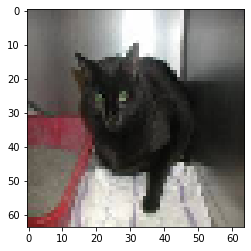

In [79]:
train_X,train_Y,test_X,test_Y = load_dataset()

Training images shape:::: (2998, 64, 64, 3)
Training labels shape:::: (2998,)
Test images shape:::: (998, 64, 64, 3)
Test labels shape:::: (998,)
0


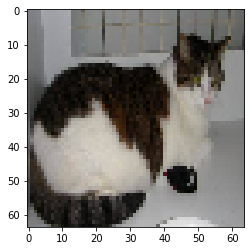

In [80]:
p = np.random.permutation(2998)
train_x = train_X[p]
train_y = train_Y[p]
p = np.random.permutation(998)
test_x = test_X[p]
test_y = test_Y[p]
print("Training images shape::::",train_x.shape)
print("Training labels shape::::",train_y.shape)
print("Test images shape::::",test_x.shape)
print("Test labels shape::::",test_y.shape)
print(train_Y[1234])
plt.imshow(train_X[1234])

In [81]:
aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,
                         horizontal_flip=True,fill_mode="nearest")

In [82]:
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [83]:
model.fit(aug.flow(train_x,train_y,batch_size = 32),epochs=150,callbacks = [callback])

Epoch 1/150
94/94 [==============================] - 49s 519ms/step - loss: 1.6106 - accuracy: 0.5620
Epoch 2/150
94/94 [==============================] - 42s 446ms/step - loss: 0.9312 - accuracy: 0.5891
Epoch 3/150
94/94 [==============================] - 27s 291ms/step - loss: 0.9007 - accuracy: 0.6184
Epoch 4/150
94/94 [==============================] - 27s 290ms/step - loss: 0.8804 - accuracy: 0.6187
Epoch 5/150
94/94 [==============================] - 34s 364ms/step - loss: 0.8594 - accuracy: 0.6177
Epoch 6/150
94/94 [==============================] - 28s 298ms/step - loss: 0.8396 - accuracy: 0.6304
Epoch 7/150
94/94 [==============================] - 28s 302ms/step - loss: 0.8164 - accuracy: 0.6561
Epoch 8/150
94/94 [==============================] - 28s 293ms/step - loss: 0.8053 - accuracy: 0.6388
Epoch 9/150
94/94 [==============================] - 28s 299ms/step - loss: 0.7787 - accuracy: 0.6651
Epoch 10/150
94/94 [==============================] - 30s 316ms/step - loss: 0.747

94/94 [==============================] - 51s 540ms/step - loss: 0.5035 - accuracy: 0.8152
Epoch 81/150
94/94 [==============================] - 50s 531ms/step - loss: 0.4865 - accuracy: 0.8102
Epoch 82/150
94/94 [==============================] - 53s 566ms/step - loss: 0.4987 - accuracy: 0.8135
Epoch 83/150
94/94 [==============================] - 50s 535ms/step - loss: 0.5000 - accuracy: 0.8075
Epoch 84/150
94/94 [==============================] - 45s 480ms/step - loss: 0.4882 - accuracy: 0.8095
Epoch 85/150
94/94 [==============================] - 54s 576ms/step - loss: 0.4934 - accuracy: 0.8215
Epoch 86/150
94/94 [==============================] - 64s 685ms/step - loss: 0.4854 - accuracy: 0.8225
Epoch 87/150
94/94 [==============================] - 67s 716ms/step - loss: 0.4916 - accuracy: 0.8252
Epoch 88/150
94/94 [==============================] - 63s 672ms/step - loss: 0.4901 - accuracy: 0.8189
Epoch 89/150
94/94 [==============================] - 51s 541ms/step - loss: 0.4896 - 

In [84]:
preds = model.evaluate(test_x,test_y)
print(preds)

998/998 [==============================] - 4s 4ms/step
[0.46916373065096106, 0.8406813740730286]


(1, 64, 64, 3)
[[0.]]


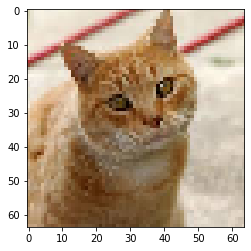

In [106]:
import cv2
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
img = cv2.imread("images/download.jpg")
### START CODE HERE ###
img_path = 'images/download3.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(64, 64))
plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)

print(np.floor(model.predict(x)))